# How the weather in Hong Kong differs from the weather in Paris?
## In a few descriptive statistics...

## (1) Temperature profile

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="dark")

In [48]:
treated_data_rep = r'../0_Data/wrangled/' 
PARIS_AGG = pd.read_pickle(treated_data_rep+"PARIS_AGG.pkl")
HKDaily_AGG = pd.read_pickle(treated_data_rep+"HKDaily_AGG.pkl")

In [49]:
Daily_Weather_Comp= HKDaily_AGG.join(PARIS_AGG, on = "Date", rsuffix = "_PAR")
Daily_Weather_Comp['month'] = Daily_Weather_Comp.index.month


In [50]:
table_graph1 = Daily_Weather_Comp[['month', 'TX','TX_PAR']].reset_index(drop = True)
table_graph1 = table_graph1.melt(id_vars = "month")

/var/folders/6b/16jtbq3j6w17kqv1h2k9_zt80000gn/T/ipykernel_23196/736993824.py:2: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  g = sns.violinplot(data=table_graph1, x="month", y="value", hue="variable",


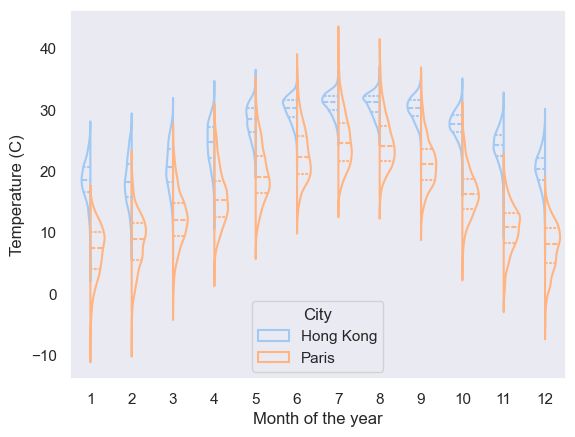

In [51]:
# Violin Plot of Temperature
g = sns.violinplot(data=table_graph1, x="month", y="value", hue="variable",
               split=True, inner="quart", fill=False,
               palette=sns.color_palette("pastel"))

g.set_ylabel("Temperature (C)")
g.set_xlabel("Month of the year")

# Legend Modifications:

L=plt.legend(loc='lower center', title='City')
L.get_texts()[0].set_text('Hong Kong')
L.get_texts()[1].set_text('Paris')

Temperature variation for twe cities seems to move in the same direction along the year - a diminution of temperature from October to December and back to an progressive increase during the period from January to July. 

Temperature in Hong Kong varies much less than in Paris, within the month (See the temperature standard deviation per month in the table below) and within the year (5.4 vs. 7.6 of standard deviation).

It is an interesting point that, in the winter time, the temperature varies more than in the summer time in Hong Kong, while it is the opposite for Paris. Which means that, in Hong Kong, it is hot every day in the summer without much variation between different days, and it is less hot but with much more variation in the winter - so it can still be hot. In Paris, in the summer time it is more variable in the summer time - there is more chance that hot weather come and go for some days in summer. However, the temperature will be more or less steadily lower in the winter time.

Therefore, in terms of temperature, Summer in Hong Kong will be more painful with its restless hot weather, and Winter will be more enjoyable since it is more probable to have some extraordinary sunny and warm day for the winter.

In [73]:
temperature_avg = Daily_Weather_Comp[['month','TX', 'TX_PAR']].groupby('month').agg(func=["mean", "var", "std"])
print(temperature_avg.reset_index()[[('TX', 'mean')]].max()-temperature_avg.reset_index()[[('TX', 'mean')]].min())
print(temperature_avg.reset_index()[[('TX_PAR', 'mean')]].max()-temperature_avg.reset_index()[[('TX_PAR', 'mean')]].min())
print(Daily_Weather_Comp[['TX', 'TX_PAR']].agg(func=["mean", "var", "std"]))
temperature_avg

TX  mean    12.624416
dtype: object
TX_PAR  mean    17.955518
dtype: float64
             TX     TX_PAR
mean  25.399813  15.959487
var   29.326604  58.331795
std    5.415404   7.637525


TX                          TX_PAR                     
            mean        var       std       mean        var       std
month                                                                
1      18.485476   9.853673  3.139056   6.974156  17.429718  4.174891
2      18.398781  14.206765  3.769186   8.449039  18.867800  4.343708
3      20.815414  13.475079  3.670842  12.195983  18.449779  4.295321
4      24.536914  11.247149  3.353677  15.631511  19.703428  4.438854
5      28.168006   6.927624  2.632038  19.496937  19.697061  4.438137
6      30.061886   3.859614  1.964590  22.766983  19.049913  4.364621
7      31.023197   2.995222  1.730671  24.929674  18.409032  4.290575
8      30.853032   3.292301  1.814470  24.633177  17.004355  4.123634
9      30.114573   3.702311  1.924139  21.342070  15.102672  3.886216
10       27.6434   4.277624  2.068242  16.433811  14.968935  3.868971
11     24.095999   6.811258  2.609839  10.718230  13.843830  3.720730
12     20.310548   8.190449  2.861896   7.700655  15.418157  3.926596